EDA for the Heart Disease Data

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import seaborn as sns

health = pd.read_csv('heart_2020.csv')

In [2]:
#check out the columns
health.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Column Questions

HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

Stroke: Have you ever been told you had a stroke?

PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 was your physical health not good?

MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

DiffWalking: Do you have serious difficulty walking or climbing stairs?

Sex: Are you male or female?


In [3]:
#check for missing data
health.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
#check the type of each column
health.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
#convert yes/no columns to category type
health['Smoking'] = health['Smoking'].astype('category')
health['AlcoholDrinking'] = health['AlcoholDrinking'].astype('category')
health['Stroke'] = health['Stroke'].astype('category')
health['DiffWalking'] = health['DiffWalking'].astype('category')
health['Sex'] = health['Sex'].astype('category')
health['Diabetic'] = health['Diabetic'].astype('category')
health['PhysicalActivity'] = health['PhysicalActivity'].astype('category')
health['Asthma'] = health['Asthma'].astype('category')
health['KidneyDisease'] = health['KidneyDisease'].astype('category')
health['SkinCancer'] = health['SkinCancer'].astype('category')
health['HeartDisease'] = health['HeartDisease'].astype('category')
health['AgeCategory'] = health['AgeCategory'].astype('category')
health['HeartDisease'] = health['HeartDisease'].astype('category')
health['GenHealth'] = health['GenHealth'].astype('category')
health['Race'] = health['Race'].astype('category')

In [6]:
#recheck the type of each column
health.dtypes

HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
dtype: object

In [7]:
#get baseline statistics for the numerical columns
health.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


I will be to investigate more on the BMI with a max of 94.85.

In [8]:
#map yes to 1 and no to 0
health.HeartDisease = health.HeartDisease.map(dict(Yes=1, No=0))
health.Smoking = health.Smoking.map(dict(Yes=1, No=0))
health.DiffWalking = health.DiffWalking.map(dict(Yes=1, No=0))
health.Diabetic = health.Diabetic.map(dict(Yes=1, No=0))
health.PhysicalActivity = health.PhysicalActivity.map(dict(Yes=1, No=0))
health.Asthma = health.Asthma.map(dict(Yes=1, No=0))
health.KidneyDisease = health.KidneyDisease.map(dict(Yes=1, No=0))
health.SkinCancer = health.SkinCancer.map(dict(Yes=1, No=0))
health.AlcoholDrinking = health.AlcoholDrinking.map(dict(Yes=1, No=0))
health.Stroke = health.Stroke.map(dict(Yes=1, No=0))

In [9]:
#map Female to 1 and Male to 0
health.Sex = health.Sex.map(dict(Female=1, Male=0))

In [10]:
health.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [11]:
#map GenHealth to 1-5
#health.GenHealth = health.GenHealth.map(dict(Poor=1, Fair=2, Good=3, Excellent=5))
mapping = {'Poor':'1', 'Fair':'2', 'Good':'3', 'Very good' : '4', 'Excellent':'5'}
health['GenHealth_Number'] = health['GenHealth'].replace(mapping)

In [12]:
health.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Number
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,1.0,1,Very good,5.0,1,0,1,4
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,0.0,1,Very good,7.0,0,0,0,4
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,1.0,1,Fair,8.0,1,0,0,2
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,0.0,0,Good,6.0,0,0,1,3
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,0.0,1,Very good,8.0,0,0,0,4


In [13]:
health.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'American Indian/Alaskan Native'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'White')])

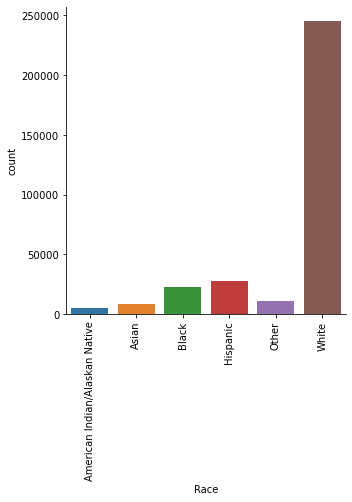

In [34]:
sns.catplot(x = 'Race', data = health, kind = 'count')
plt.xticks(rotation = 90)

In [15]:
health.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [16]:
health.SleepTime.value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [17]:
health.SleepTime.value_counts(normalize=True)

7.0     0.305668
8.0     0.305202
6.0     0.208637
5.0     0.059988
9.0     0.050160
10.0    0.024378
4.0     0.024234
12.0    0.006895
3.0     0.006229
2.0     0.002464
1.0     0.001723
11.0    0.001298
14.0    0.000760
16.0    0.000738
15.0    0.000591
18.0    0.000319
13.0    0.000303
20.0    0.000200
24.0    0.000094
17.0    0.000066
22.0    0.000028
19.0    0.000009
23.0    0.000009
21.0    0.000006
Name: SleepTime, dtype: float64

Text(0, 0.5, 'Count')

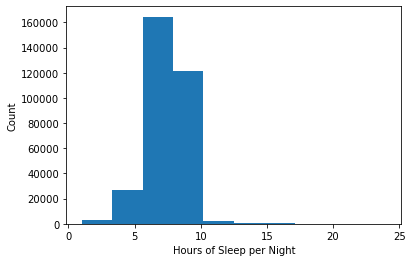

In [18]:
plt.hist(health['SleepTime'], bins=10)
plt.xlabel("Hours of Sleep per Night")
plt.ylabel("Number of People")

In [19]:
#create groups for sleeping: SleepGroups
#1-6, 7-12, 13-18, 19-24
health['SleepGroups'] = pd.cut(health['SleepTime'], right=False, bins=4, 
                      labels=['1-6', '7-12', '13-18','19-24'])

In [20]:
health[['SleepTime','SleepGroups']].head(10)

,SleepTime,SleepGroups
0,5.0,1-6
1,7.0,7-12
2,8.0,7-12
3,6.0,1-6
4,8.0,7-12
5,12.0,7-12
6,4.0,1-6
7,9.0,7-12
8,5.0,1-6
9,10.0,7-12


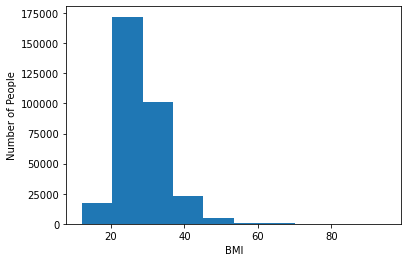

In [22]:
_ = plt.hist(health.BMI)
plt.xlabel("BMI")
plt.ylabel("Number of People")
plt.show()

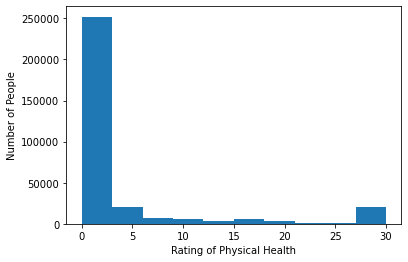

In [23]:
_ = plt.hist(health.PhysicalHealth)
plt.xlabel("Days during the past 30 with poor physical health")
plt.ylabel("Number of People")
plt.show()

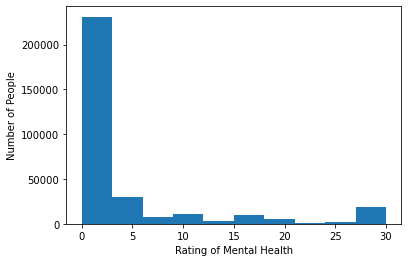

In [24]:
_ = plt.hist(health.MentalHealth)
plt.xlabel("Days during the past 30 with poor mental health")
plt.ylabel("Number of People")
plt.show()

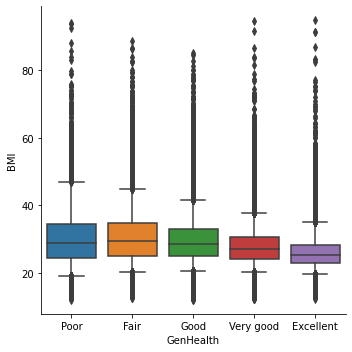

In [47]:
sns.catplot(x = 'GenHealth', y = 'BMI', data = health, kind = 'box', order=['Poor','Fair','Good','Very good','Excellent'],whis=[5,95])

There appears to be many outliers and not much difference between the groups.

In [26]:
#create groups for BMI: BMIGroups
health['BMIGroups'] = pd.cut(health['BMI'],  bins=[0,16,18.5,25,30,35,40,np.inf], 
                      labels=['Severe Thinness', 'Thinness', 'Normal','Overweight','Obese','Severely Obese','Morbidly Obese'])

In [27]:
health['BMIGroups'].value_counts(normalize=True)

Overweight         0.357588
Normal             0.305752
Obese              0.191276
Severely Obese     0.078266
Morbidly Obese     0.051127
Thinness           0.013828
Severe Thinness    0.002164
Name: BMIGroups, dtype: float64

In [41]:
health[health['BMI']==max(health.BMI)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Number,SleepGroups,BMIGroups
126896,0,94.85,0,0,0,0.0,0.0,0,0,35-39,...,0.0,1,Excellent,7.0,0,0,0,5,7-12,Morbidly Obese


This person is interesting to note.  They rate themselves as "Excellent" health, yet have a BMI of 94.85.

In [28]:
health['AgeCategory'].value_counts(normalize=True)

65-69          0.106790
60-64          0.105336
70-74          0.097140
55-59          0.093050
50-54          0.079370
80 or older    0.075527
45-49          0.068141
75-79          0.067174
18-24          0.065867
40-44          0.065686
35-39          0.064260
30-34          0.058641
25-29          0.053018
Name: AgeCategory, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '18-24'),
  Text(1, 0, '25-29'),
  Text(2, 0, '30-34'),
  Text(3, 0, '35-39'),
  Text(4, 0, '40-44'),
  Text(5, 0, '45-49'),
  Text(6, 0, '50-54'),
  Text(7, 0, '55-59'),
  Text(8, 0, '60-64'),
  Text(9, 0, '65-69'),
  Text(10, 0, '70-74'),
  Text(11, 0, '75-79'),
  Text(12, 0, '80 or older')])

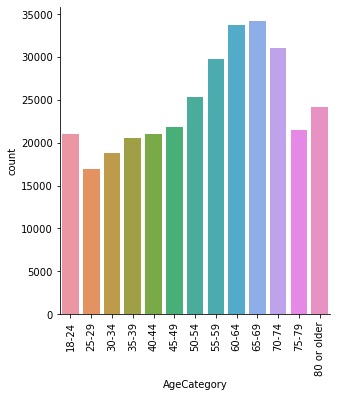

In [30]:
sns.catplot(x = 'AgeCategory', data = health, kind = 'count')
plt.xticks(rotation = 90)